In [ ]:
#Assignment 4
#Title: Credit Card Default Prediction  
#Name: Sri Vishal Kotari 
#Course Title: Machine Learning 
#Department Name: Computer Science

In [ ]:
#The primary objective of this project is to create a robust predictive model for assessing the risk of payment default among clients based on a comprehensive dataset of 30,000 individuals from Taiwan. The project aims to achieve the following specific goals:

#Data Exploration and Preprocessing:

#Conduct an in-depth exploratory data analysis (EDA) to understand the dataset's structure, identify trends, and visualize relationships among variables.
#Address data quality issues, such as missing values and outliers, to ensure the integrity of the dataset.

#Address Class Imbalance:

#Analyze the extent of class imbalance within the dataset, where a minority of clients default on payments.
#Implement techniques such as resampling (oversampling the minority class or undersampling the majority class), synthetic data generation (e.g., SMOTE), or adjusting class weights to mitigate the imbalance and improve model training.

#Feature Engineering:

#Identify and create relevant features that contribute to predicting payment defaults, leveraging the available demographic, financial, and historical payment data.
#Assess the importance of different features using techniques like feature selection or dimensionality reduction to enhance model performance.

#Model Development and Evaluation:

#Develop multiple machine learning models (e.g., logistic regression, decision trees, random forests, and ensemble methods) to compare their performance in predicting defaults.
#Evaluate model performance using appropriate metrics such as accuracy, precision, recall, F1-score, and AUC-ROC, with a focus on improving metrics relevant to the minority class.

#Validation and Testing:

#Implement cross-validation techniques to ensure the robustness and generalizability of the models.
#Test the final model on unseen data to validate its predictive capability and reliability in real-world scenarios.

#Insights and Recommendations:

#Provide actionable insights and recommendations for financial institutions on identifying high-risk clients, thereby aiding in credit risk management.
#Discuss potential implications of the findings on future lending practices and client management strategies.
#By achieving these objectives, the project aims to contribute valuable knowledge in the area of credit risk assessment and enhance the ability of financial institutions to make informed decisions regarding client creditworthiness.

In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'D:\Masters In CS\Subjects\Fall Semester\Machine Learning\Assignmnet 4\default+of+credit+card+clients\default of credit card clients.xls'  # Update the file path if necessary
df = pd.read_excel(file_path, skiprows=1)
print("Data Info:")
print(df.info())
# Display the first few rows of the dataset to ensure it loaded correctly
df.head()
df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [3]:
# Check for missing values
df.isnull().sum()
print("\nMissing Values:")
print(df.isnull().sum())





Missing Values:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


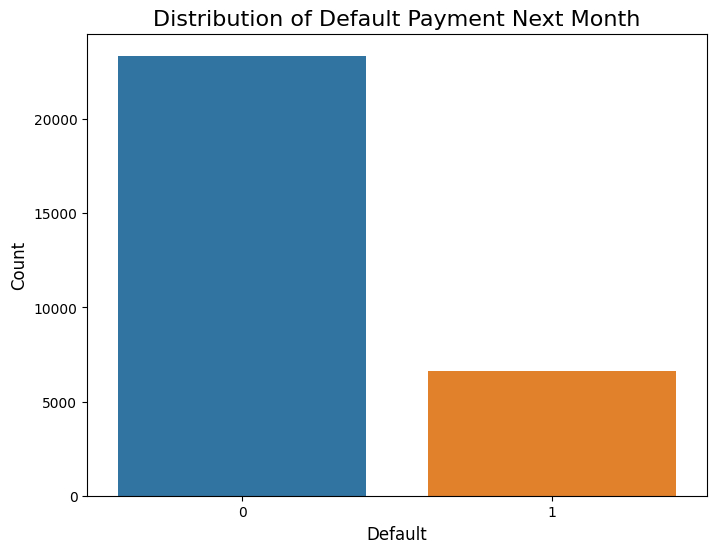

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(8, 6))

# Plot the distribution of the target variable
sns.countplot(x='default payment next month', data=df)
plt.title('Distribution of Default Payment Next Month', fontsize=16)
plt.xlabel('Default', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()


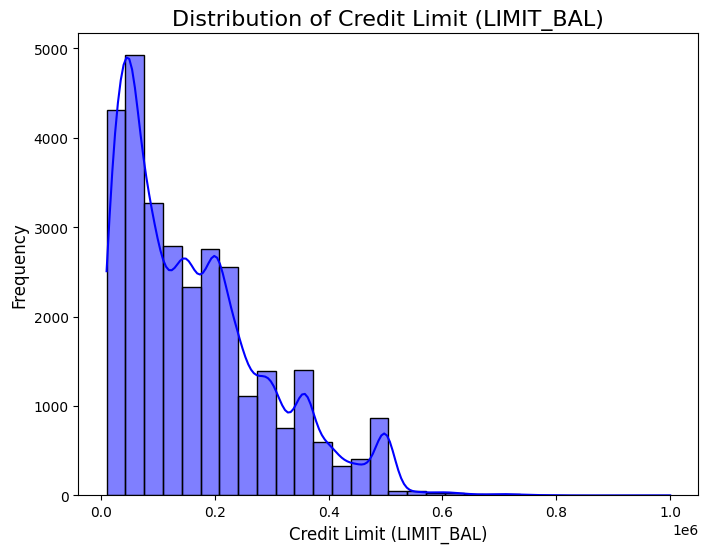

In [12]:
# Set figure size for better readability
plt.figure(figsize=(8, 6))

# Plot the distribution of LIMIT_BAL (Credit Limit)
sns.histplot(df['LIMIT_BAL'], kde=True, bins=30, color='blue')
plt.title('Distribution of Credit Limit (LIMIT_BAL)', fontsize=16)
plt.xlabel('Credit Limit (LIMIT_BAL)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()


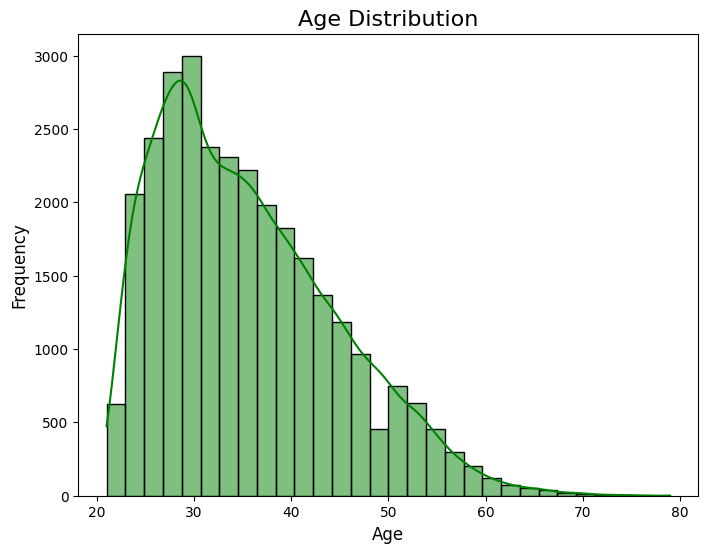

In [13]:
# Set figure size for better readability
plt.figure(figsize=(8, 6))

# Plot the distribution of AGE
sns.histplot(df['AGE'], kde=True, bins=30, color='green')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()


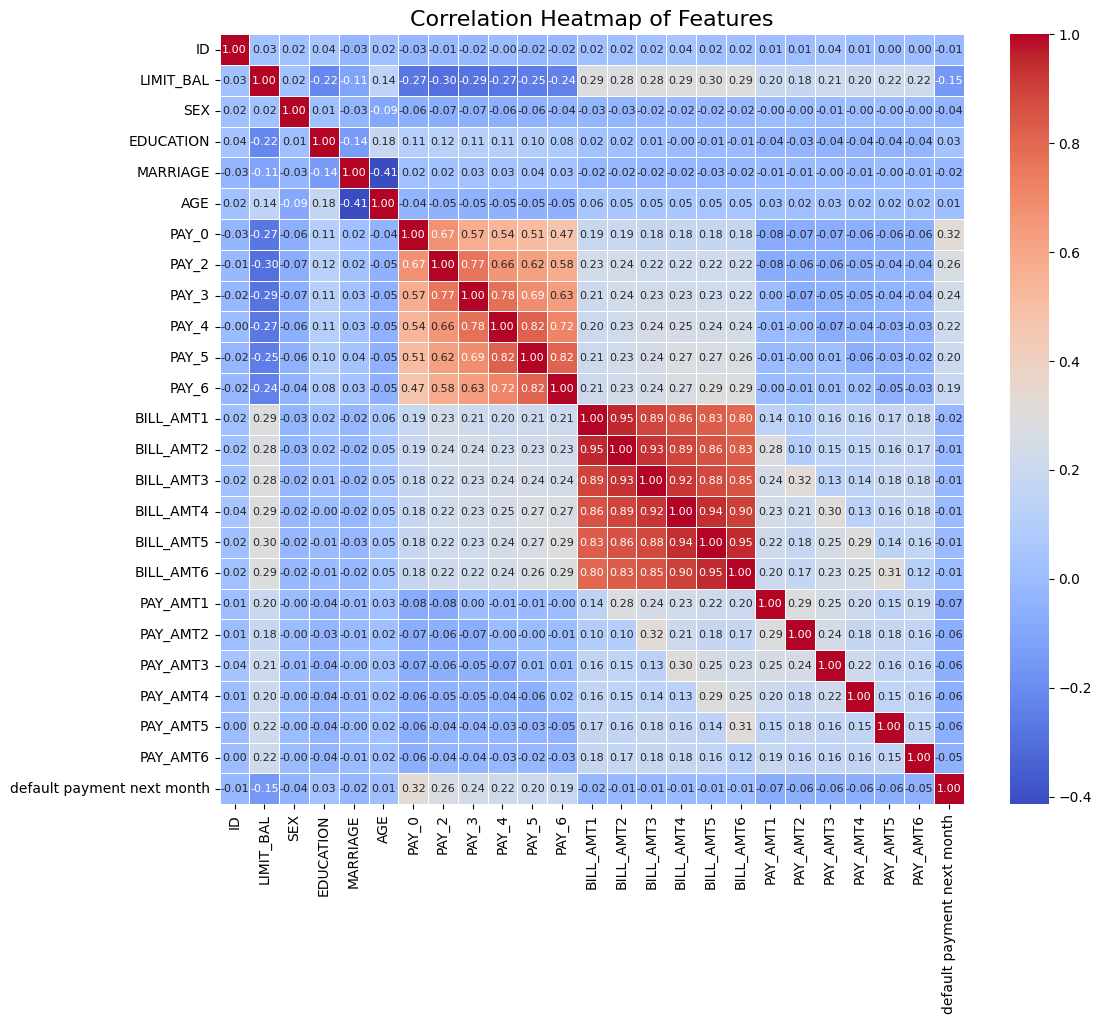

In [14]:
# Set a larger figure size to avoid overlap
plt.figure(figsize=(12, 10))

# Create the correlation heatmap with adjusted annotation font size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Heatmap of Features', fontsize=16)

# Display the heatmap
plt.show()


Logistic Regression - Mean Accuracy: 0.81, Std Dev: 0.00

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.23      0.35      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

Random Forest - Mean Accuracy: 0.82, Std Dev: 0.00

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.36      0.45      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



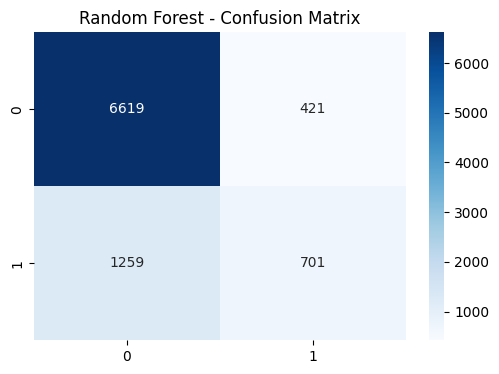

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
# Evaluate Logistic Regression with Cross-Validation
log_reg_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Logistic Regression - Mean Accuracy: {log_reg_scores.mean():.2f}, Std Dev: {log_reg_scores.std():.2f}')

# Predictions and Evaluation for Logistic Regression
y_pred_log = log_reg.predict(X_test_scaled)
print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log))

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate Random Forest with Cross-Validation
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f'Random Forest - Mean Accuracy: {rf_scores.mean():.2f}, Std Dev: {rf_scores.std():.2f}')

# Predictions and Evaluation for Random Forest
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest - Confusion Matrix')
plt.show()

ROC AUC Score:  0.6468383290816326


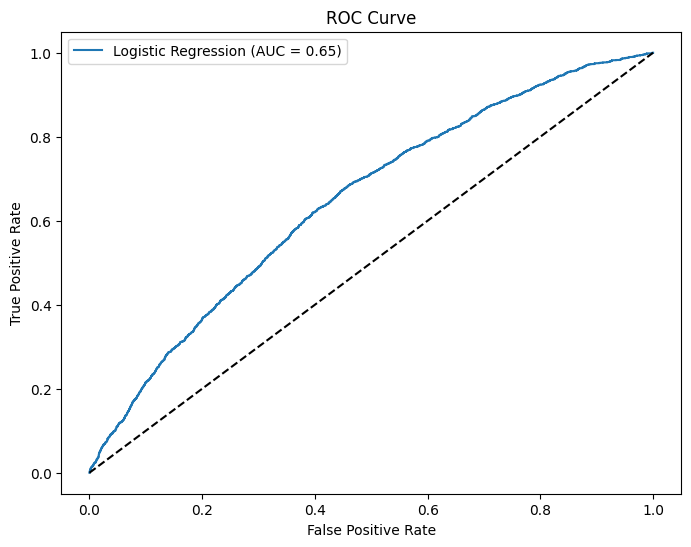

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score: ", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [1]:
import gradio as gr
# Gradio App for Model Deployment
def predict_default(LIMIT_BAL, AGE, PAY_0, BILL_AMT1, PAY_AMT1):
    input_data = np.array([[LIMIT_BAL, AGE, PAY_0, BILL_AMT1, PAY_AMT1]])
    input_data_scaled = scaler.transform(input_data)
    prediction = log_reg.predict(input_data_scaled)
    return 'Default' if prediction[0] == 1 else 'No Default'

# Create Gradio interface
interface = gr.Interface(
    fn=predict_default,
    inputs=[
        gr.inputs.Number(label='Credit Limit Balance'),
        gr.inputs.Number(label='Age'),
        gr.inputs.Number(label='Repayment Status (Last Month)'),
        gr.inputs.Number(label='Bill Amount (Last Month)'),
        gr.inputs.Number(label='Payment Amount (Last Month)')
    ],
    outputs="text",
    title="Credit Card Default Prediction App"
)

# Launch the Gradio app
interface.launch()

C:\Users\vishal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\gradio\inputs.py:60: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
C:\Users\vishal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\gradio\inputs.py:62: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)


IMPORTANT: You are using gradio version 3.34.0, however version 4.44.1 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
